<a href="https://colab.research.google.com/github/Daalleee/Klasifikasi-kematangan-buah-pepaya/blob/main/PemrosesanCitra_Buah_Pepaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Untuk menampilkan gambar di Colab
from google.colab import files

In [ ]:
# Baca semua gambar dari folder data/
def get_image_files(data_path):
    import os
    image_extensions = ('.jpg', '.jpeg', '.png')
    image_files = []

    for root, dirs, files in os.walk(data_path):
        for file in files:
            if file.lower().endswith(image_extensions):
                image_files.append(os.path.join(root, file))

    return sorted(image_files)

# Ganti path jika dataset ada di Google Drive
data_path = "/content/drive/MyDrive/datasetpepaya"  # Ubah sesuai lokasi dataset di Colab

# Jika Anda upload folder data ke colab, uncomment baris berikut:
# data_path = "/content/data/"

all_images = get_image_files(data_path)
print(f"Total gambar: {len(all_images)}")

# Kelompokkan berdasarkan kondisi
kategori = {'mentah': 0, 'setengah': 0, 'matang': 0}
for img_path in all_images:
    if 'mentah' in img_path:
        kategori['mentah'] += 1
    elif 'setengah' in img_path:
        kategori['setengah'] += 1
    elif 'matang' in img_path:
        kategori['matang'] += 1

for k, v in kategori.items():
    print(f"{k}: {v} gambar")

Total gambar: 53
mentah: 16 gambar
setengah: 11 gambar
matang: 26 gambar


In [ ]:
# Fungsi ekstraksi fitur warna
def extract_color_features(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    mean_rgb = np.mean(img_rgb, axis=(0,1))
    mean_hsv = np.mean(img_hsv, axis=(0,1))

    return mean_rgb, mean_hsv

In [ ]:
# Ekstraksi fitur
results = []

for img_path in all_images:
    mean_rgb, mean_hsv = extract_color_features(img_path)

    if 'matang' in img_path:
        kondisi = 'matang'
    elif 'setengah' in img_path:
        kondisi = 'setengah matang'
    else:
        kondisi = 'mentah'

    results.append({
        'file': os.path.basename(img_path),
        'kondisi': kondisi,
        'R': mean_rgb[0],
        'G': mean_rgb[1],
        'B': mean_rgb[2],
        'H': mean_hsv[0],
        'S': mean_hsv[1],
        'V': mean_hsv[2]
    })

df = pd.DataFrame(results)
df.head(10)

,file,kondisi,R,G,B,H,S,V
0,20251110_140826.jpg,matang,224.045898,191.532350,127.428421,70.137788,124.437536,230.016732
1,20251110_141709.jpg,matang,196.745700,172.215007,140.696844,24.125878,82.331540,198.619750
2,20251110_141717.jpg,matang,155.472042,127.093775,95.678233,14.497435,105.397267,155.475318
3,20251110_141751.jpg,matang,241.537737,232.755467,210.866572,33.227732,37.352364,242.397683
4,20251110_141755.jpg,matang,240.113899,232.244526,204.028088,41.892545,44.836763,241.860183
5,20251110_142239.jpg,matang,114.542012,92.080747,78.325044,31.206028,87.530965,115.874406
6,20251110_142241.jpg,matang,118.967466,98.360175,86.760920,29.425970,73.664775,119.891902
7,20251110_142247.jpg,matang,119.865924,103.431889,95.627547,43.933574,56.265045,120.744470
8,20251110_142253.jpg,matang,193.674082,174.914340,164.333835,48.483843,42.642109,194.546390
9,20251110_142255.jpg,matang,187.337496,166.281661,151.990153,49.574906,53.738527,188.663294


In [ ]:
# Tabel analisis warna
analisis = df.groupby('kondisi')[['R', 'G', 'B', 'H', 'S', 'V']].mean().round(2)
analisis

,R,G,B,H,S,V
kondisi,,,,,,
matang,172.47,149.74,131.09,35.73,68.84,173.90
mentah,135.06,125.30,116.06,37.05,58.14,137.93
setengah matang,143.76,138.60,129.36,55.76,47.87,147.67


/tmp/ipython-input-1038380016.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_h = df.groupby('kondisi')['H'].mean()
/tmp/ipython-input-1038380016.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_h = df.groupby('kondisi')['H'].mean()
/tmp/ipython-input-1038380016.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_rgb = df.groupby('kondisi')[['R', 'G', 'B']].mean()


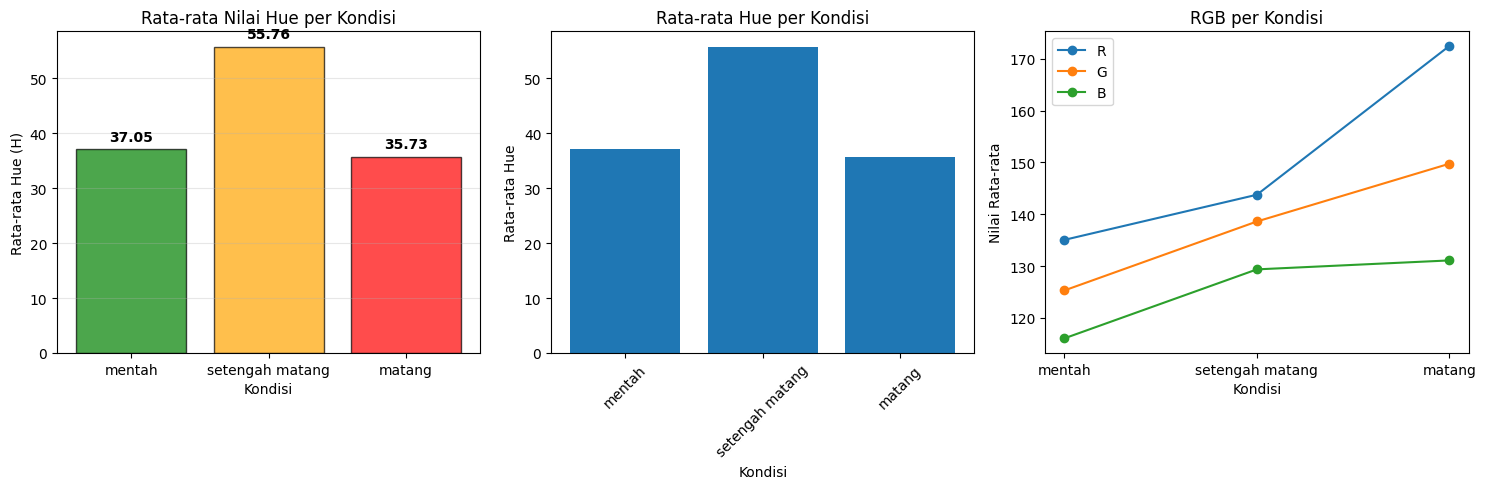

In [ ]:
# Visualisasi - Gabungkan tiga grafik dalam satu figure
plt.figure(figsize=(15, 5))

kondisi_urutan = ['mentah', 'setengah matang', 'matang']
df['kondisi'] = pd.Categorical(df['kondisi'], categories=kondisi_urutan, ordered=True)

# Grafik 1: Bar plot Nilai Hue per Kondisi (tanpa titik-titik)
plt.subplot(1, 3, 1)
mean_h = df.groupby('kondisi')['H'].mean()
colors = ['green', 'orange', 'red']
plt.bar(mean_h.index, mean_h.values, color=colors, alpha=0.7, edgecolor='black', linewidth=1)
for i, v in enumerate(mean_h.values):
    plt.text(i, v + 1, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')
plt.xlabel('Kondisi')
plt.ylabel('Rata-rata Hue (H)')
plt.title('Rata-rata Nilai Hue per Kondisi')
plt.grid(axis='y', alpha=0.3)

# Grafik 2: Bar plot Rata-rata Hue per Kondisi (alternatif)
plt.subplot(1, 3, 2)
mean_h = df.groupby('kondisi')['H'].mean()
plt.bar(mean_h.index, mean_h.values)
plt.xlabel('Kondisi')
plt.ylabel('Rata-rata Hue')
plt.title('Rata-rata Hue per Kondisi')
plt.xticks(rotation=45)

# Grafik 3: Line plot RGB per Kondisi
plt.subplot(1, 3, 3)
mean_rgb = df.groupby('kondisi')[['R', 'G', 'B']].mean()
plt.plot(mean_rgb.index, mean_rgb['R'], label='R', marker='o')
plt.plot(mean_rgb.index, mean_rgb['G'], label='G', marker='o')
plt.plot(mean_rgb.index, mean_rgb['B'], label='B', marker='o')
plt.xlabel('Kondisi')
plt.ylabel('Nilai Rata-rata')
plt.title('RGB per Kondisi')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Simpan hasil analisis ke CSV
df.to_csv('hasil_analisis_warna.csv', index=False)
print("File hasil_analisis_warna.csv telah disimpan")

File hasil_analisis_warna.csv telah disimpan
